# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Adisti Rachma Pitaloka]
- **Email:** [adistiraa98@gmail.com]
- **ID Dicoding:** [adistiyra]

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan pola penyewaan antara pengguna kasual dan terdaftar pada saat holiday dan working day??
- Apakah ada korelasi antara musim dan jumlah penyewaan sepeda?
- Apakah ada korelasi antara cuaca dan jumlah penyewaan sepeda?
- Pada tahun dan bulan berapa jumlah penyewaan sepeda mencapai puncaknya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

Mengimport data sehingga bisa dilakukan pengumpulan data, saya menggunakan data **Bike Sharing Dataset** yang terdiri dari day.csv dan hour.csv

### Gathering Data

### Load Tabel Hour

In [ ]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


menampilkan 5 baris pertama dari tabel day


# Load Tabel Day


In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


menampilkan 5 baris pertama dari tabel hour

### Assessing Data

# Menilai data hour_df

1. checking data type data hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Di baris kedua terdapat dteday yang data type nya tidak sesuai dan harus diubah dari object menjadi datetime

2. checking missing value

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dapat dilihat, tidak ada missing value pada tabel hour

3. checking duplicate data

In [ ]:
print("Jumlah duplikasi data = ", hour_df.duplicated().sum())

Jumlah duplikasi data =  0


tidak terdeteksi adanya duplikasi data

4. checking statistic value

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Menilai data day_df

1. checking data type day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Di baris kedua terdapat dteday yang data type nya tidak sesuai dan harus diubah dari object menjadi datetime

2. checking missing value

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dapat dilihat, tidak ada missing value pada tabel day

3. checking duplicate data

In [ ]:
print("Jumlah duplikasi data = ", day_df.duplicated().sum())

Jumlah duplikasi data =  0


tidak terdeteksi adanya duplikasi data

4. checking statistic value

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

1. JIka dilihat dari ketiga pertanyaan bisnis di atas, akan dilakukan **penghapusan tabel hour** karena antara tabel day dan hour itu yang berbeda hanya di kolom hr saja dan yang lainnya sama.

In [ ]:
del hour_df

2. **Menghapus kolom pada tabel yang tidak sesuai dengan peryanyaan bisnis dan tidak digunakan dalam analisis data.**
Seperti **instant** yang hanya menunjukkan jumlah baris dan **windspeed** yaitu kecepatan angin.

In [ ]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. **Mengubah beberapa informasi pada kolom** karena nama judul kolom yang berupa singkatan sulit untuk dimengerti serta beberapa informasi data yang dituliskan dengan data angka bukan keteragan.

In [ ]:
# Mengubah nama judul singkatan pada kolom

day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
#Mengubah data informasi pada kolom yang masih menggunakan angka dalam menulis keterangan

day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_condition'] = day_df['weather_condition'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}) #keterangan didapatkan di Readme pada zip data


Pada tahap assesing data tipe data pada masing masing kolong masih tidak sesuai dengan tipe data yang seharusnya, sehingga pada langkah ini akan dilakukan perubahan tipe data

In [ ]:
# Mengubaha tipe data ke categorical

day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')

#Mengubah tipe data ke datetime

day_df['dateday'] = pd.to_datetime(day_df.dateday)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dateday            731 non-null    datetime64[ns]
 1   season             731 non-null    category      
 2   year               731 non-null    category      
 3   month              731 non-null    category      
 4   holiday            731 non-null    category      
 5   weekday            731 non-null    category      
 6   workingday         731 non-null    category      
 7   weather_condition  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  hum                731 non-null    float64       
 11  casual             731 non-null    int64         
 12  registered         731 non-null    int64         
 13  count              731 non-null    int64         
dtypes: categor

Bisa dilihat tipe data pada tiap kolom sudah sesuai dengan yang seharusnya

## Exploratory Data Analysis (EDA)

**Explore data day_df**

1. Mengelompokkan pengguna sepeda casual dan terdaftar berdasarkan bulan

In [ ]:
day_df.groupby(by='month').agg({
    'count': ['min', 'max', 'mean', 'sum']
})

<ipython-input-25-91a1537d1ef9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        min   max         mean     sum
month                                 
Apr     795  7460  4484.900000  269094
Aug    1115  7865  5664.419355  351194
Dec     441  6606  3403.806452  211036
Feb    1005  5062  2655.298246  151352
Jan     431  4521  2176.338710  134933
Jul    3285  8173  5563.677419  344948
Jun    3767  8120  5772.366667  346342
Mar     605  8362  3692.258065  228920
May    2633  8294  5349.774194  331686
Nov    1495  6852  4247.183333  254831
Oct      22  8156  5199.225806  322352
Sep    1842  8714  5766.516667  345991

Berdasarkan hasil pengelompokan diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan yang memiliki rata-rata terkecil adalah bulan Januari.

2. Mengelompokkan penyewa sepeda casual dan registered berdasarkan musim

In [ ]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['min', 'max', 'mean']
})

<ipython-input-26-c2d173b7cc39>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


casual   registered count                   
               mean         mean   min   max         mean
season                                                   
Fall    1202.611702  4441.691489  1115  8714  5644.303191
Spring   334.928177  2269.204420   431  7836  2604.132597
Summer  1106.097826  3886.233696   795  8362  4992.331522
Winter   729.112360  3999.050562    22  8555  4728.162921

Berdasarkan hasil pengelompokan di atas, baik penyewa sepeda casual dan terdaftar banyak yang menyewa pada saat musim gugur (fall). Sedangkan, jumlah yang penyewa sepeda baik casual maupun terdaftar pada musim semi paling rendah rata-ratanya.

3. Mengelompokkan penyewa sepeda casual maupun registerd berdasarkan cuaca

In [ ]:
day_df.groupby(by='weather_condition').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['min', 'max', 'mean']
})

<ipython-input-27-4a597408c8fb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather_condition').agg({


casual   registered count                   
                           mean         mean   min   max         mean
weather_condition                                                    
Clear/Partly Cloudy  964.030238  3912.755940   431  8714  4876.786177
Light Snow/Rain      185.476190  1617.809524    22  4639  1803.285714
Misty/Cloudy         687.352227  3348.510121   605  8362  4035.862348

Berdasarkan data pengelompokan di atas ketika cuaca sangat buruk terlihat tidak ada yang menyewa sepeda. Banyak penyewa casual maupun registered yang menyewa sepeda pada saat cuaca cerah dan yang terendah saat cuaca hujan/salju ringan

4. Mengelompokkan penyewa sepeda casual dan registered berdasarkan holiday

In [ ]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-28-6767227fada1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

5. Hubungan antara penyewa casual, registered, dan count

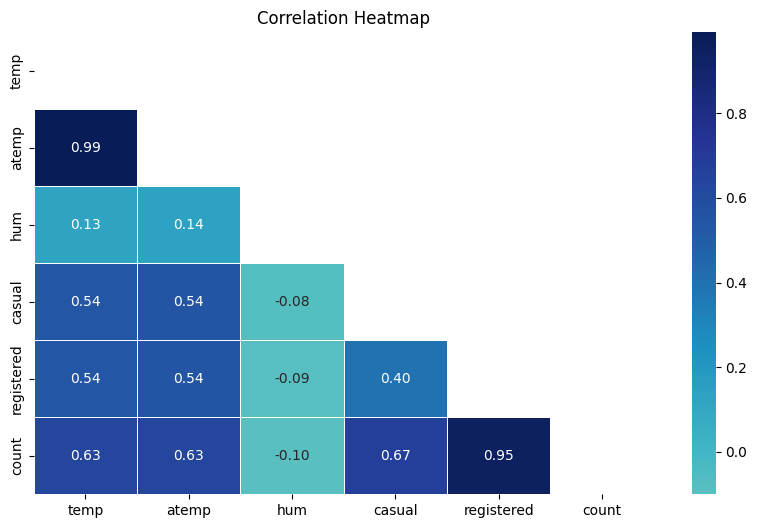

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True) #untuk mengetahui korelasi pada tabel day_df
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="YlGnBu",
    center=0,
    fmt=".2f",
    linewidths=0.5,
)

plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan memiliki kolerasi negatif dengan hum (-0.08).
- baik casual maupun registered memiliki pola yang sama, dan berkorelasi sebesar(0.40) atau bisa dikatakan sebagai korelasi yang cukup atau moderat.
- count memiliki korelasi negatif dengan hum (-0.10) dan berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apakah ada perbedaan pola penyewaan antara pengguna kasual dan terdaftar pada saat holiday?


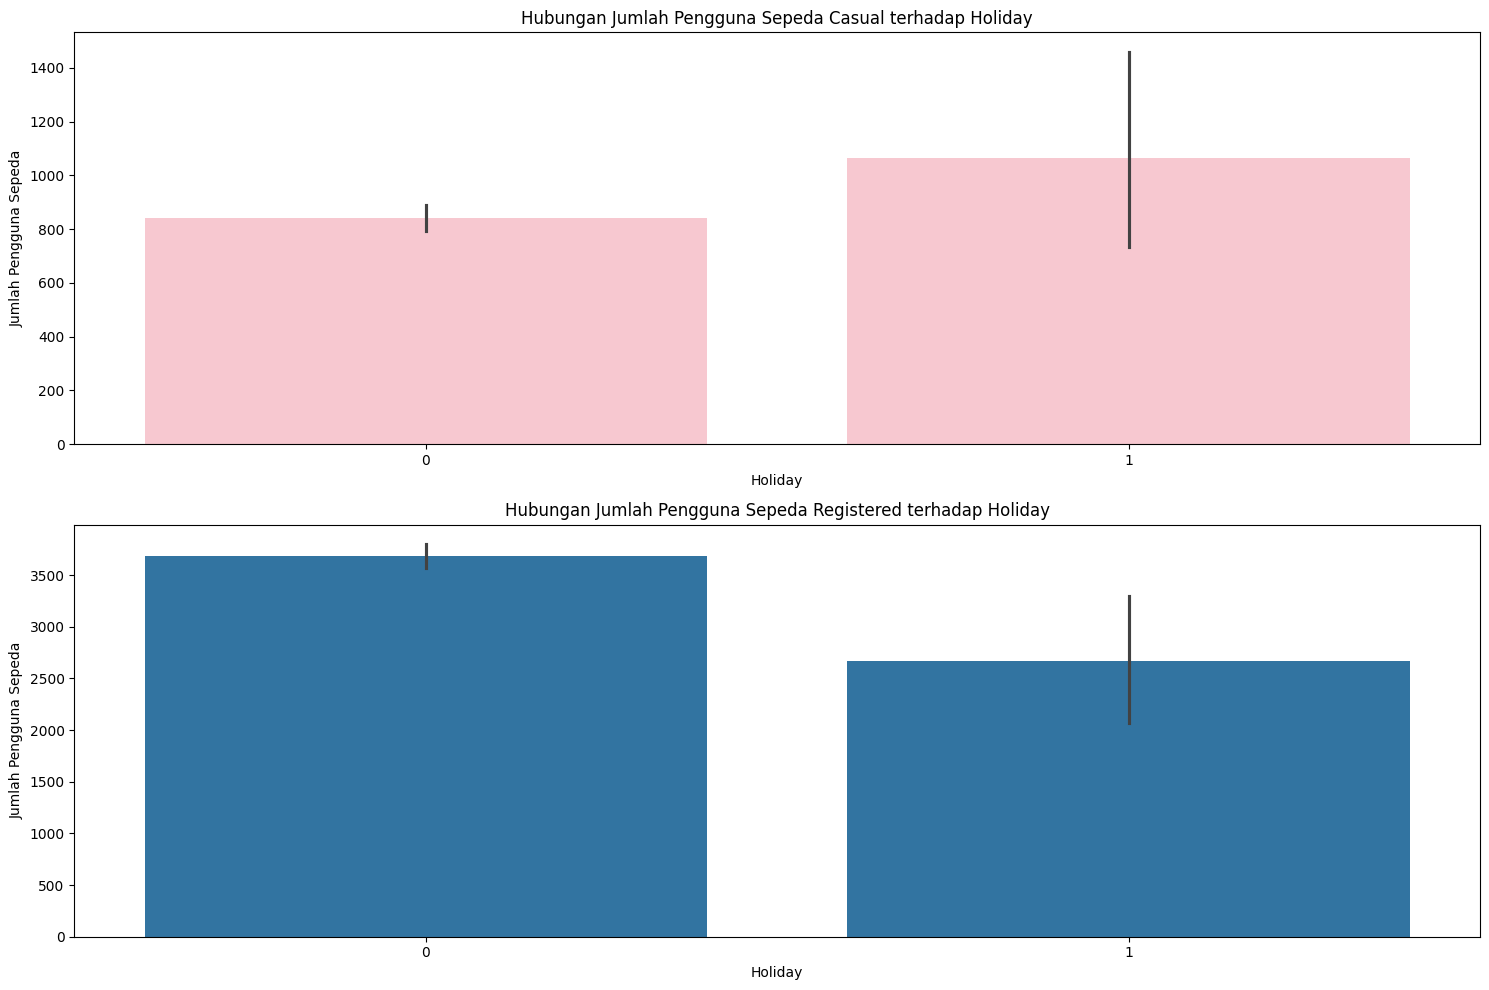

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

#Berdasarkan pengguna casual

sns.barplot(
    x='holiday',
    y='casual',
    data=day_df,
    ax=axes[0],
    color='pink')

axes[0].set_title('Hubungan Jumlah Pengguna Sepeda Casual terhadap Holiday')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

#Berdasarkan pengguna registered

sns.barplot(
  x='holiday',
  y='registered',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Hubungan Jumlah Pengguna Sepeda Registered terhadap Holiday')
axes[1].set_xlabel('Holiday')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi grafik di atas bisa disimpulkan terdapat perbedaan pola peyewaan sepeda antara penyewa casual dengan holiday:
- Jumlah penyewa casual saat holiday(1) lebih tinggi daripada saat tidak holday(0)
- Jumlah penyewa registered saat holiday(1) lebih rendah daripada saat tidak holday(0)

### Pertanyaan 2:

Apakah musim yang berganti setiap tahunnya mempengaruhi jumlah penyewaan sepeda?


<ipython-input-38-4d337ae9611f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()


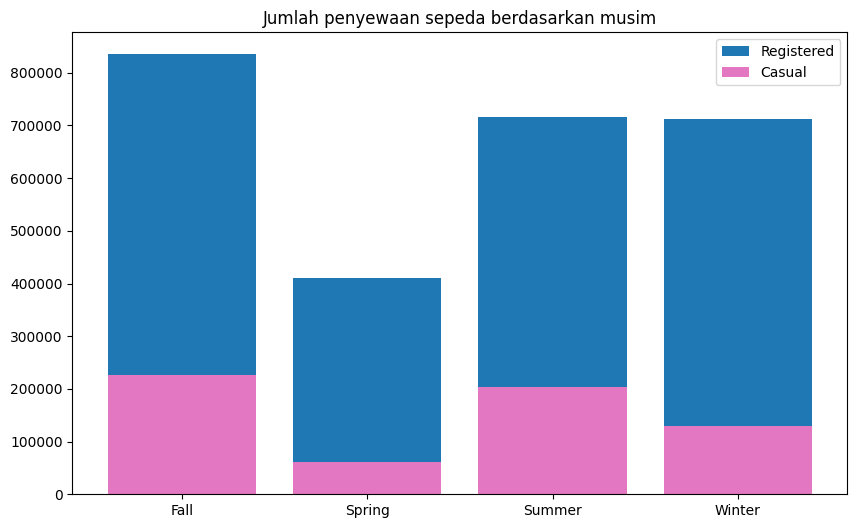

In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan casual dan registered

seasonal_user = day_df.groupby('season')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat grafik

plt.bar(
    seasonal_user['season'],
    seasonal_user['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_user['season'],
    seasonal_user['casual'],
    label='Casual',
    color='tab:pink'
)


plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan grafik di atas dapat dikatakan penyewa sepeda baik casual maupun registered suka menyewa sepeda saat di musim gugur (fall), lalu musim panas (summer), musim dingin (winter), dan yang paling rendah jumlah sepeda yang disewa yaitu pada musim semi (spring).

## Pertanyaan 3

Apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

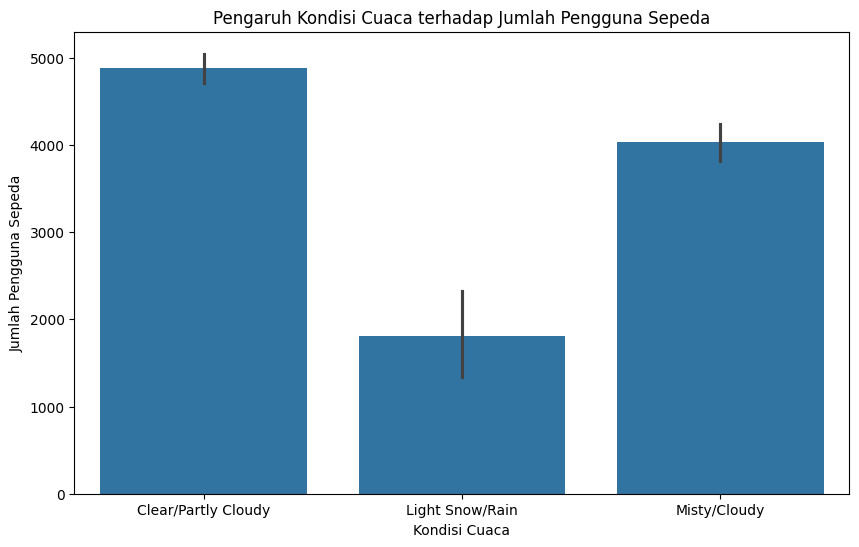

In [ ]:
plt.figure(figsize=(10,6))


sns.barplot(
    x='weather_condition',
    y='count',
    data=day_df)

plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan grafik di atas, jumlah pengguna sepeda paling tinggi saat kondisi cuaca cerah (clear/partly cloudy), lalu yang kedua saat cuacanya berawan (misty/cloudly), dan yang terakhir saat cuaca hujan/salju ringan (light snow/rain)

## Pertanyaan 4

Pada tahun dan bulan berapa jumlah penyewaan sepeda mencapai puncaknya?

<ipython-input-40-ff7ebe5a3a78>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month","year"]).agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


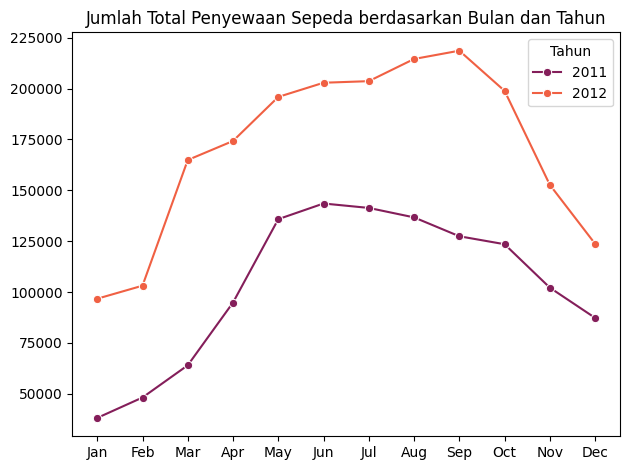

In [ ]:
day_df['month'] = pd.Categorical(day_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

monthly_counts['year'] = monthly_counts['year'].map({0: 2011, 1: 2012})

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
     marker="o")

plt.title("Jumlah Total Penyewaan Sepeda berdasarkan Bulan dan Tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan garfik di atas bisa dilihat perbedaan jumlah penyewaan sepeda antara tahun 2011 dan 2012 sangat berbeda jauh. Untuk di 2011 puncaknya pada bulan Juni dan pada tahun 2012 puncaknya ada di bulan September.

# Analisis Lanjutan

Untuk analisis lanjutan saya menggunakan clustering yang bertujuan untukmengelompokkan data ke dalam grup berdasarkan karakteristik tertentu. Metode yang saya gunakan kali ini adalah **Binning** yaitu  membagi data ke dalam interval atau kategori tertentu. Data yang akan digunakan yaitu count(pengguna), suhu(temp), dan kelembapan(hum). Data penyewa baik yang casual maupun registered akan dikelompokkan ke dalam interval low, medium, dan high demand. Selanjutnya untuk suhu dan kelembapan akan dikategorikan menjadi low, medium, dan high.

1. Mengelompokkan jumlah pengguna (count) ke interval low, medium, dan high demand

In [ ]:
def demand_category(count):
    if count < 1000:
        return 'Low Demand'
    elif 1000 <= count <= 1500:
        return 'Medium Demand'
    else:
        return 'High Demand'

#Menambahkan kolom kategori jumlah pengguna
day_df['demand_group'] = day_df['count'].apply(demand_category)

2. Mengelompokkan suhu(temp) dan kelembapan(hum)

In [ ]:
#Binning untuk suhu (temp) dan kelembapan (hum)
temp_bins = [0, 0.3, 0.6, 1.0]
hum_bins = [0, 0.3, 0.6, 1.0]

temp_labels = ['Low', 'Medium', 'High']
hum_labels = ['Low', 'Medium', 'High']

day_df['temp_binned'] = pd.cut(day_df['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)
day_df['hum_binned'] = pd.cut(day_df['hum'], bins=hum_bins, labels=hum_labels, include_lowest=True)

3. Visualisasi data untuk distribusi kategori suhu dan kelembapan terhadap demand group

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


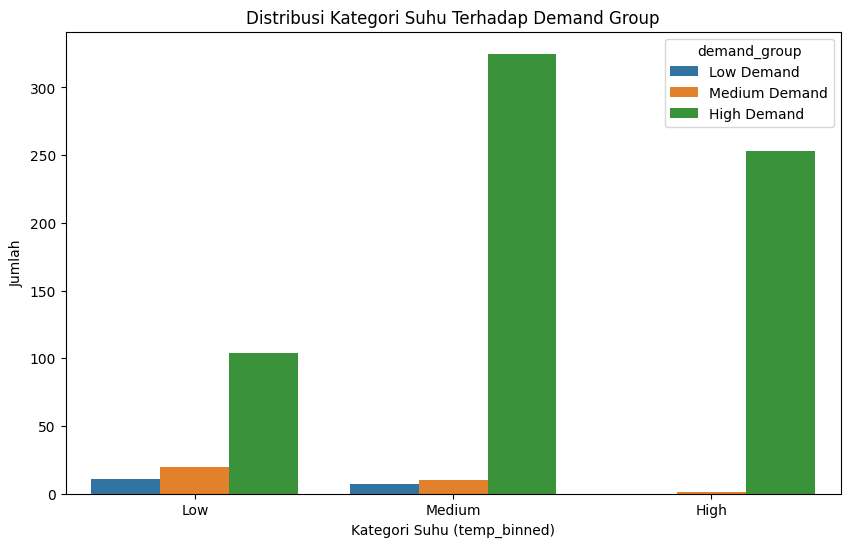

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


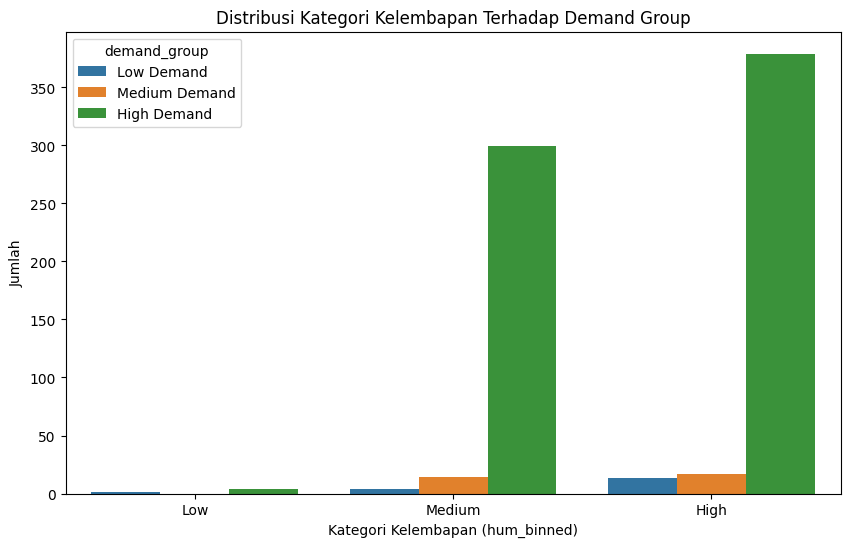

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='temp_binned', hue='demand_group', data=day_df)
plt.title('Distribusi Kategori Suhu Terhadap Demand Group')
plt.xlabel('Kategori Suhu (temp_binned)')
plt.ylabel('Jumlah')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='hum_binned', hue='demand_group', data=day_df)
plt.title('Distribusi Kategori Kelembapan Terhadap Demand Group')
plt.xlabel('Kategori Kelembapan (hum_binned)')
plt.ylabel('Jumlah')
plt.show()


**Berdasarkan grafik pertama**, dapat dilihat bahwa:
- Suhu Sedang adalah kategori suhu yang paling berpengaruh terhadap peningkatan permintaan.
- Suhu Rendah dan Tinggi cenderung memiliki permintaan yang lebih rendah.

**Berdasarkan grafik pertama**, dapat dilihat bahwa:
- Saat kelembapannya tinggi pengguna sepeda cenderung tetap tinggi juga.
- Saat kelembapannya medium, pengguna sepeda juga cenderung tinggi namun masih di bawah saat kelembapannya tinggi.
- Saat kelembapannya rendah, maka pengguna sepeda juga cenderung rendah.



## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi data dapat terlihat jelas ada perbedaan pola penyewaan sepeda dari pengguna casual dengan registered saat holiday. Untuk pengguna casual, jumlah penyewaan sepedanya lebih tinggi daripada saat tidak holiday (weekday / working day). Sedangkan untuk pengguna registered sangat berkebalikan dengan pengguna casual, jumlah penyewaan sepeda lebih tinggi saat tidak holidy (weekday / working day) daripada saat holiday. Hal ini menunjukkan pengguna registered memang benar-benar mendaftar untuk bisa menyewa sepeda tiap waktu terutama saat weekday/working day. Sedangkan untuk pengguna casual kebanyakan hanya menyewa saat holiday saja, tetapi ini menunjukkan bahwa penyewaan sepeda ini bisa menjangkau banyak orang, tidak hanya pengguna registered tetapi pengguna casual (orang yang tidak terdaftar) juga. Sehingga dapat disimpulkan terdapat perbedaan pola penyewaan antara pengguna casual dengan registered.

- Conclution pertanyaan 2 : Berdasarkan visualisasi data di atas dapat dilihat penyewa sepeda baik casual maupun registered suka menyewa sepeda saat di musim gugur (fall), lalu musim panas (summer), musim dingin (winter), dan yang paling rendah jumlah sepeda yang disewa yaitu pada musim semi (spring). Hal ini sangat mengejutkan karena penyewaan sepeda paling rendah saat musim semi (spring) bukan saat musim dingin (winter). Namun hal tersebut, bisa terjadi karena beberapa hal lainnya seperti holiday, kelembapan, temperatur udara, dll. Sehingga dapat disimpulkan bahwa musim yang berganti tiap tahunnya sangat mempengaruhi jumlah penyewaan sepeda.

- Conclution pertanyaan 3 : Berdasarkan visualisasi data dapat dilihat jumlah pengguna sepeda paling tinggi saat kondisi cuaca cerah (clear/partly cloudy), lalu yang kedua saat cuacanya berawan (misty/cloudly), dan yang terakhir saat cuaca hujan/salju ringan (light snow/rain). Hal tersebut sangat masuk akal, karena orang akan menyewa sepeda saat cuacanya cerah bukan saat cuacanya buruk dan mengerikan seperti hujan petir atau badai. Sehingga dapat disimpulkan bahwa kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda.

- Conclution pertanyaan 4 : Berdasarkan visualisasi data yang telah dilakukan, bisa dilihat perbedaan jumlah penyewaan sepeda antara tahun 2011 dan 2012 sangat berbeda jauh. Untuk di 2011 puncaknya pada bulan Juni dan pada tahun 2012 puncaknya ada di bulan September. Sedangkan, tahun 2011 paling rendah saat Januari dan tahun 2012 paling rendah saat Januari juga. Sehingga dapat disimpulkan jumlah penyewaan sepeda memuncak saat bulan September di tahun 2012.

- Conclution Analisis Lanjutan = Berdasarkan visualisasi data yang dilakukan saat analisis lanjutat dapat disimpulkan bahwa suhu dan kelembapan sangat berpengaruh terhadap jumlah pengguna sepeda. Hal ini bisa terjadi dikarenakan orang yang akan menyewa sepeda pasti memikirkan suhu dan kelembapan yang dirasakan pengguna sepeda. Jika suhunya termasuk sedang, maka permintaan pelanggan dalam menyewa sepeda akan lebih tinggi dibandingkan saat suhunya rendah atau tinggi. Sedangkan jika kelembapannya tinggi maka permintaan pelanggan dalam menyewa sepeda juga tinggi dibandingkan saat kelembapannya sedang atau rendah.

In [ ]:
all_df = pd.DataFrame(day_df)
all_df.to_csv("all_data.csv", index=False)